Index(['Poids_poulet_g', 'Nourriture_consommee_g_jour', 'Temperature_enclos_C',
       'Humidite_%', 'Age_poulet_jours', 'Gain_poids_jour_g', 'Taux_survie_%',
       'Cout_elevage_FCFA'],
      dtype='object')

La moyenne, médiane, écart-type, variance et les quartiles pour la variable Poids_poulet_g
Moyenne Poids_poulet_g : 2509.58
Médiane Poids_poulet_g : 2481.5
Variance Poids_poulet_g : 807188.8176884422
Ecart-type Poids_poulet_g : 898.4368746263937
Quartiles Poids_poulet_g : 0.25    1810.75
0.50    2481.50
0.75    3356.50
Name: Poids_poulet_g, dtype: float64

La moyenne, médiane, écart-type, variance et les quartiles pour la variable Nourriture_consommee_g_jour
Moyenne Nourriture_consommee_g_jour : 129.745
Médiane Nourriture_consommee_g_jour : 135.5
Variance Nourriture_consommee_g_jour : 1936.542688442211
Ecart-type Nourriture_consommee_g_jour : 44.00616648200808
Quartiles Nourriture_consommee_g_jour : 0.25     95.75
0.50    135.50
0.75    165.25
Name: Nourriture_consommee_g_jour, 

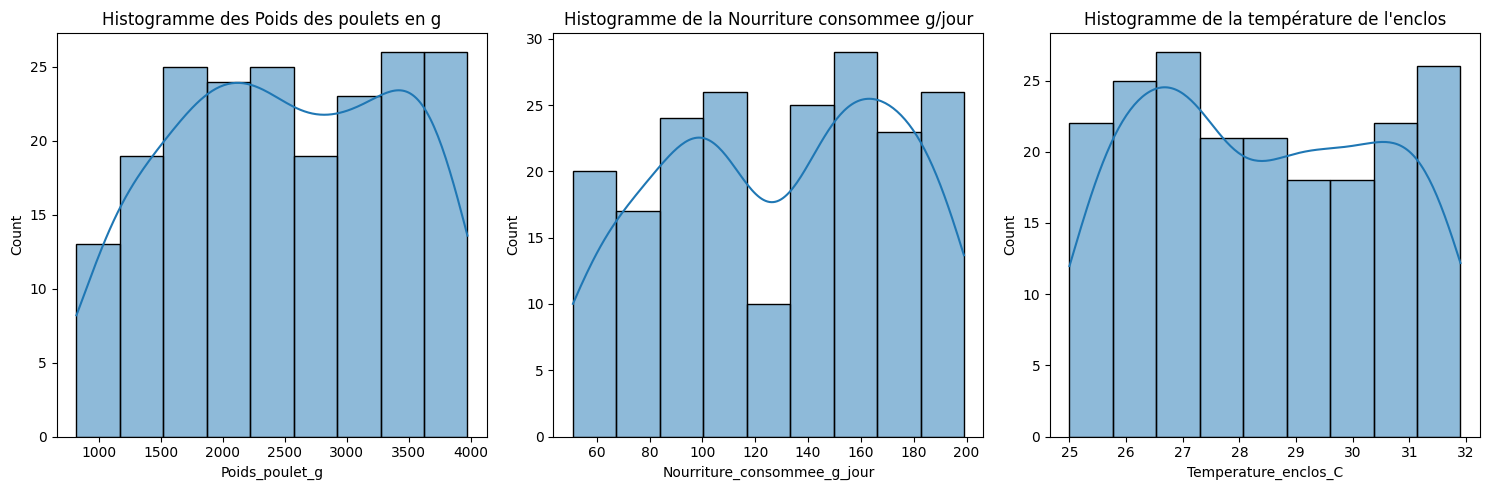

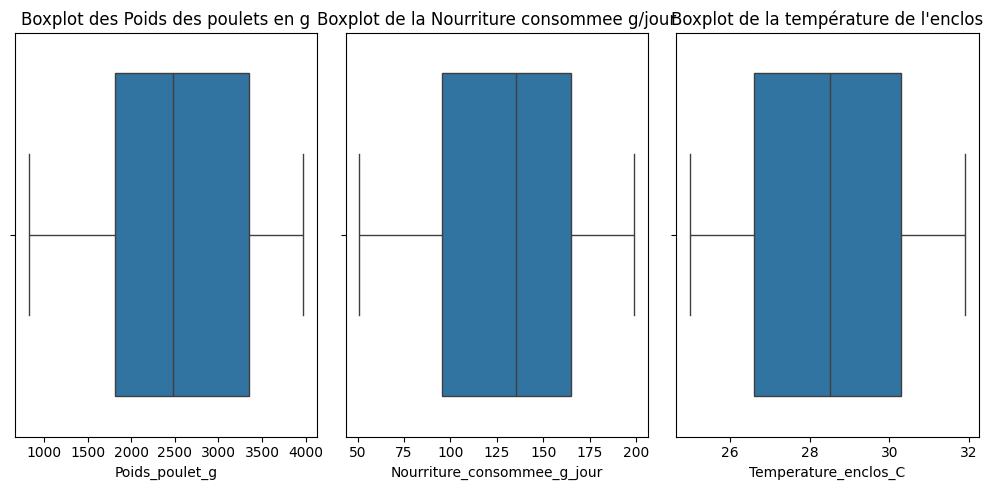

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



# Chargement des données
url = r'C:\Users\babou\Desktop\M1_OIVM\ATDN\S2\TP\TP2\donnees_elevage_poulet.csv'
data = pd.read_csv(url)
print(data.columns)


# Partie 1 : Analyse exploratoire des données
# Exercice 1 : Statistiques descriptives
variables = ['Poids_poulet_g', 'Nourriture_consommee_g_jour', 'Temperature_enclos_C']
for element in variables:
    moyenne = data[element].mean()
    mediane = data[element].median()
    var = data[element].var()
    ecart_type = data[element].std()
    quartile = data[element].quantile([0.25, 0.5, 0.75])
    print(f"\nLa moyenne, médiane, écart-type, variance et les quartiles pour la variable {element}")
    print(f'Moyenne {element} : {moyenne}')
    print(f'Médiane {element} : {mediane}')
    print(f'Variance {element} : {var}')
    print(f'Ecart-type {element} : {ecart_type}')
    print(f'Quartiles {element} : {quartile}')
    

# 2.3 Visualisation des données
# 2. Tracez des histogrammes et des boxplots pour visualiser la répartition des données.
# Que pouvez-vous déduire de ces graphiques ? Les données semblent-elles homogènes ou dispersées ?
# Histogramme
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data['Poids_poulet_g'], kde=True)
plt.title('Histogramme des Poids des poulets en g')

plt.subplot(1, 3, 2)
sns.histplot(data['Nourriture_consommee_g_jour'], kde=True)
plt.title('Histogramme de la Nourriture consommee g/jour')

plt.subplot(1, 3, 3)
sns.histplot(data['Temperature_enclos_C'], kde=True)
plt.title('Histogramme de la température de l\'enclos')

plt.tight_layout()
plt.show()

# Boxplots pour identifier les outliers
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=data['Poids_poulet_g'])
plt.title('Boxplot des Poids des poulets en g')

plt.subplot(1, 3, 2)
sns.boxplot(x=data['Nourriture_consommee_g_jour'])
plt.title('Boxplot de la Nourriture consommee g/jour')

plt.subplot(1, 3, 3)
sns.boxplot(x=data['Temperature_enclos_C'])
plt.title('Boxplot de la température de l\'enclos')

plt.tight_layout()
plt.show()


Interprétation des histogrammes et des boxplots :

Poids des poulets (g) :
La distribution semble relativement symétrique.
L'écart entre le premier et le troisième quartile est large, indiquant une certaine dispersion des poids.
Il n’y a pas d’outliers visibles, donc les valeurs semblent cohérentes.

Nourriture consommée (g/jour) :
La distribution est assez étalée mais semble homogène.
La médiane est centrée, ce qui indique une distribution équilibrée.
Pas d’outliers visibles.

Température de l’enclos (°C) :
Les valeurs sont regroupées autour de la médiane, suggérant peu de variabilité.
Les températures semblent homogènes, ce qui est logique si l’environnement est bien contrôlé.
Pas d’outliers détectés.

Exercice 2 : Détection des outliers


Outliers détectés avec IQR :
Poids_poulet_g: 10 outliers
Nourriture_consommee_g_jour: 14 outliers
Temperature_enclos_C: 0 outliers

Outliers détectés avec Z-Score : 159


C:\Users\babou\AppData\Local\Temp\ipykernel_45836\1707146501.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


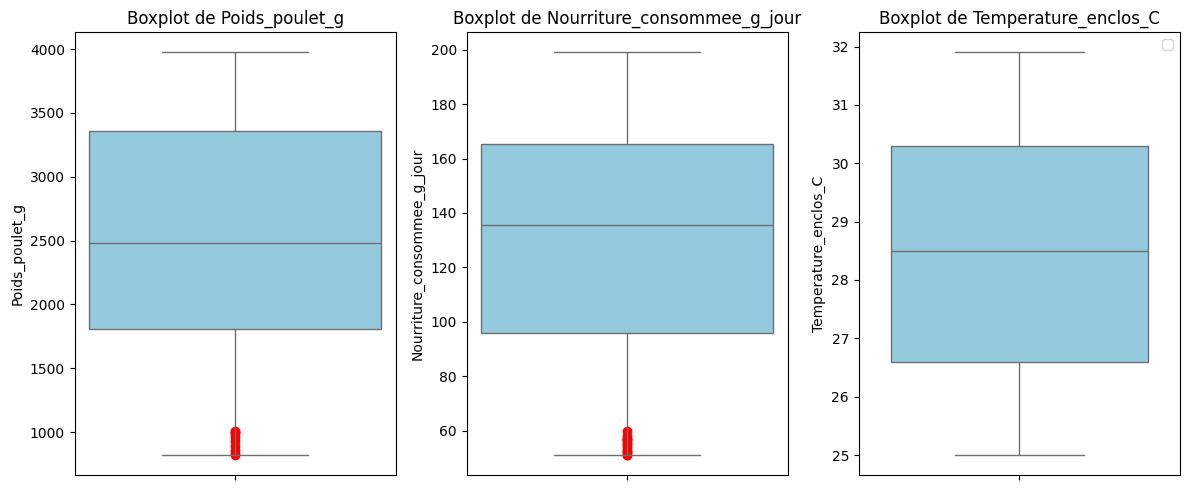

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Détection des outliers avec la méthode IQR
colonnes = ["Poids_poulet_g", "Nourriture_consommee_g_jour", "Temperature_enclos_C"]
outliers_iqr = {}

for col in colonnes:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    seuil_bas = Q1 - 0.5 * IQR
    seuil_haut = Q3 + 0.5 * IQR
    outliers_iqr[col] = data[(data[col] < seuil_bas) | (data[col] > seuil_haut)][col]

# Détection des outliers avec Z-Score (seuil = 1 pour voir plus d'outliers)
df_zscore = data[colonnes].apply(zscore)
outliers_zscore = data[(df_zscore.abs() > 1).any(axis=1)]

# Affichage des résultats
print("Outliers détectés avec IQR :")
for col, outliers in outliers_iqr.items():
    print(f"{col}: {len(outliers)} outliers")

print("\nOutliers détectés avec Z-Score :", len(outliers_zscore))

# Visualisation avec Boxplot annoté
plt.figure(figsize=(12,5))
for i, col in enumerate(colonnes, 1):
    plt.subplot(1,3,i)
    sns.boxplot(y=data[col], color="skyblue")


    outliers_iqr_points = outliers_iqr[col]
    if not outliers_iqr_points.empty:
        plt.scatter([0] * len(outliers_iqr_points), outliers_iqr_points, color="red", label="Outliers (IQR)")

    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.legend()
plt.show()


3. Détectez les outliers avec la méthode de l'écart interquartile (IQR) et la méthode du Z-Score. Comparez les résultats.
Pour détecter des outliers il faut rendre les deux méthode plus stricte en baissant le seuil de l'écart-type (3 à 1) pour la methode Z-Score et le facteur multiplicatif (1.5 à 0.5) de l'IQR pour la méthode interquartile.

Comparaison IQR vs. Z-Score :
L’IQR est plus robuste car il n’est pas affecté par la distribution des données.
Le Z-Score est utile si les données suivent une loi normale, mais peut être trop sensible aux distributions asymétriques.
- Si une variable est très asymétrique, l'IQR peut ne pas bien fonctionner.
- Si elle est normalement distribuée, alors le Z-score est souvent plus efficace.

Analyse des outliers :
Outliers réalistes (valeurs extrêmes mais logiques)
Par exemple, si un poulet beaucoup plus gros ou plus petit que la moyenne est détecté comme outlier, il peut être réaliste (poulet malade, croissance différente).
Si la nourriture consommée est beaucoup plus basse ou haute, cela peut être lié à une condition environnementale (température, alimentation).
Température de l’enclos : Une valeur extrême peut être due à une période de canicule ou de froid inhabituel, ce qui est possible.
Les outliers sont réalistes, donc on peut les conserver. Ils doivent être analysés et expliquéss pour en tirer des insight.


Exercice 3 : Tests paramétriques (4 points)
5. Testez la normalité des variables (poids, nourriture, température) avec le test de ShapiroWilk. Expliquez ce que vous observez.
Le test de Shapiro-Wilk permet de vérifier si une variable suit une distribution normale. L'hypothèse nulle (H0) est que les données suivent une loi normale.
Interprétation :
Si la p-valeur > 0.05 -> On ne rejette pas H0, les données sont normalement distribuées.
Si la p-valeur < 0.05 -> On rejette H0, les données ne suivent pas une distribution normale.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# 1. Test de normalité (Shapiro-Wilk)
def test_normalite(df, variables):
    results = []
    for var in variables:
        stat, p = stats.shapiro(df[var])
        results.append({
            'Variable': var,
            'Statistique': stat,
            'p-value': p,
            'Normalité': 'Oui' if p > 0.05 else 'Non'
        })
    return pd.DataFrame(results)

variables_test = ['Poids_poulet_g', 'Nourriture_consommee_g_jour', 'Temperature_enclos_C']
resultats_normalite = test_normalite(data, variables_test)
print("Résultats des tests de normalité :")
print(resultats_normalite)


# 3. Test t pour comparer deux groupes
data['Groupe_age'] = np.where(data['Age_poulet_jours'] < 60, 'Jeune', 'Agé')

# Test t indépendant
group1 = data[data['Groupe_age'] == 'Jeune']['Poids_poulet_g']
group2 = data[data['Groupe_age'] == 'Agé']['Poids_poulet_g']

t_stat, p_val = stats.ttest_ind(group1, group2)
print(f"\nTest t entre jeunes et agés:")
print(f"t-statistique: {t_stat:.3f}, p-value: {p_val:.3f}")
print("Conclusion:", "Différence significative" if p_val < 0.05 else "Pas de différence significative")

# 4. ANOVA pour plusieurs groupes
# Création de 3 groupes d'âge
data['Groupe_age_3'] = pd.cut(data['Age_poulet_jours'], 
                           bins=[0, 40, 80, 120],
                           labels=['0-40j', '41-80j', '81-120j'])

# ANOVA
groups = [data[data['Groupe_age_3'] == g]['Poids_poulet_g'] for g in data['Groupe_age_3'].unique()]
f_stat, p_val = stats.f_oneway(*groups)
print(f"\nANOVA entre groupes d'âge:")
print(f"F-statistique: {f_stat:.3f}, p-value: {p_val:.3f}")

# Test post-hoc Tukey si ANOVA significative
if p_val < 0.05:
    print("\nTest post-hoc Tukey HSD:")
    tukey = pairwise_tukeyhsd(endog=data['Poids_poulet_g'],
                             groups=data['Groupe_age_3'],
                             alpha=0.05)
    print(tukey)

# 5. Corrélation avec une autre variable continue
corr, p_val = stats.pearsonr(data['Poids_poulet_g'], data['Nourriture_consommee_g_jour'])
print(f"\nCorrélation Poids-Nourriture:")
print(f"Corrélation: {corr:.3f}, p-value: {p_val:.3f}")


Résultats des tests de normalité :
                      Variable  Statistique       p-value Normalité
0               Poids_poulet_g     0.956822  9.098264e-06       Non
1  Nourriture_consommee_g_jour     0.944871  6.230564e-07       Non
2         Temperature_enclos_C     0.943210  4.406064e-07       Non

Test t entre jeunes et agés:
t-statistique: 0.145, p-value: 0.885
Conclusion: Pas de différence significative

ANOVA entre groupes d'âge:
F-statistique: 0.131, p-value: 0.877

Corrélation Poids-Nourriture:
Corrélation: -0.082, p-value: 0.251


Partie 2 : Réduction de dimensionnalité

Exercice 4 : Analyse en Composantes Principales (ACP)
7. Implémentez une ACP sans scikit-learn (avec numpy). Calculez la matrice de covariance, les valeurs propres et les vecteurs propres.
8. Projetez les données sur les deux premières composantes principales et visualisez le résultat. Combien de composantes gardez-vous ? Justifiez.
On conserve 5 composantes, car à partir de la cinquième, on observe une inflexion sur la courbe, et ce nombre permet de capturer 70 % de l'information, ce qui constitue un excellent résultat.
Pour obtenir 80-90% de la variance, on peut prendre jusqu'à 7 composantes.


Matrice de covariance : [[ 1.00502513 -0.08194588  0.01915299  0.07643343 -0.04073578  0.02797066
  -0.1190977  -0.02983038]
 [-0.08194588  1.00502513 -0.18661903 -0.02405565 -0.10737917 -0.06560509
  -0.0453192   0.05806111]
 [ 0.01915299 -0.18661903  1.00502513 -0.02704035 -0.06423386  0.05927977
  -0.0021131   0.09818369]
 [ 0.07643343 -0.02405565 -0.02704035  1.00502513 -0.00174419 -0.010359
   0.02476582  0.05087189]
 [-0.04073578 -0.10737917 -0.06423386 -0.00174419  1.00502513  0.0298505
  -0.03029875  0.06285473]
 [ 0.02797066 -0.06560509  0.05927977 -0.010359    0.0298505   1.00502513
  -0.01496235  0.07228268]
 [-0.1190977  -0.0453192  -0.0021131   0.02476582 -0.03029875 -0.01496235
   1.00502513 -0.09485815]
 [-0.02983038  0.05806111  0.09818369  0.05087189  0.06285473  0.07228268
  -0.09485815  1.00502513]]
Valeurs propres : [0.6917105  0.78352396 1.27246941 0.95158043 1.15189625 1.10921505
 1.01983233 1.05997308]
Vecteurs propres : [[-0.12962048 -0.57745754  0.30000215 -0.1

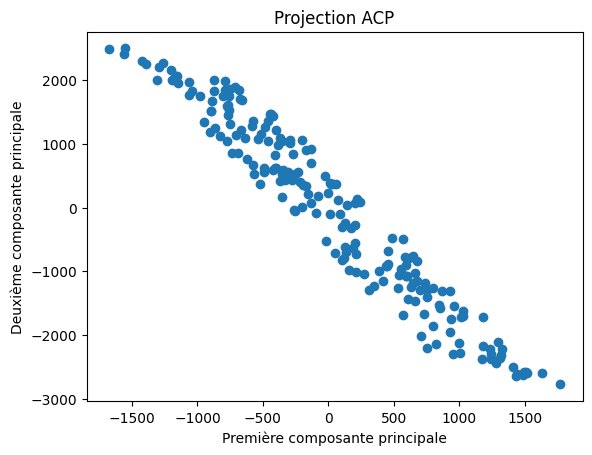

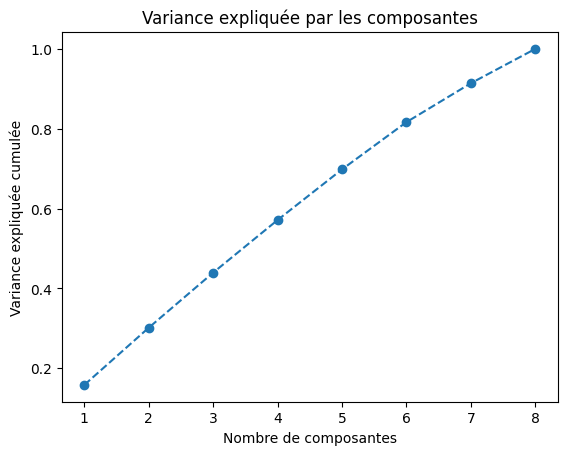

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


donnee = data.select_dtypes(include=[np.number])  
# 2. ACP manuelle avec numpy
def acp_manuelle(X):
    # Centrer les données 
    X_centre = X.values - np.mean(X.values, axis=0)
    X_normalise = X_centre / np.std(X.values, axis=0)
    # Matrice de covariance
    cov = np.cov(X_normalise, rowvar=False)
    print(f"Matrice de covariance : {cov}")
    
    # Valeurs et vecteurs propres
    valeurs_propres, vecteurs_propres = np.linalg.eig(cov)
    print("Valeurs propres :", valeurs_propres)
    print("Vecteurs propres :", vecteurs_propres)

    
    # Tri par ordre décroissant
    indices = np.argsort(valeurs_propres)[::-1]
    valeurs_propres = valeurs_propres[indices]
    vecteurs_propres = vecteurs_propres[:, indices]
    
    return valeurs_propres, vecteurs_propres

# 3. Application
valeurs_propres, vecteurs_propres = acp_manuelle(donnee)

# 4. Projection et visualisation
def projection_acp(X, vecteurs_propres, n_components=2):
    X_centre = X.values - np.mean(X.values, axis=0)
    return X_centre.dot(vecteurs_propres[:, :n_components])

X_proj = projection_acp(donnee, vecteurs_propres)

plt.scatter(X_proj[:, 0], X_proj[:, 1])
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Projection ACP')
plt.show()

# 5. Variance expliquée
variance_expliquee = valeurs_propres / np.sum(valeurs_propres)
plt.plot(range(1, len(variance_expliquee) + 1), np.cumsum(variance_expliquee), marker='o', linestyle='--')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée par les composantes')
plt.show()


Exercice 5 : ACP à Noyau (3 points)
9. Appliquez KernelPCA (avec scikit-learn) sur les données et testez différents noyaux (linéaire, RBF, polynomial).
10. Comparez les résultats avec l'ACP classique. Dans quels cas l’ACP à noyau donne-telle de meilleurs résultats ?

L’ACP à noyau peut mieux capturer les structures non linéaires des données (surtout avec un noyau RBF ou polynomial).
Elle est plus adaptée si la séparation des groupes est non linéaire.

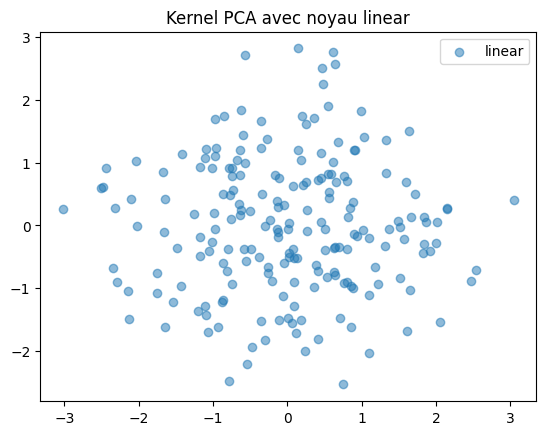

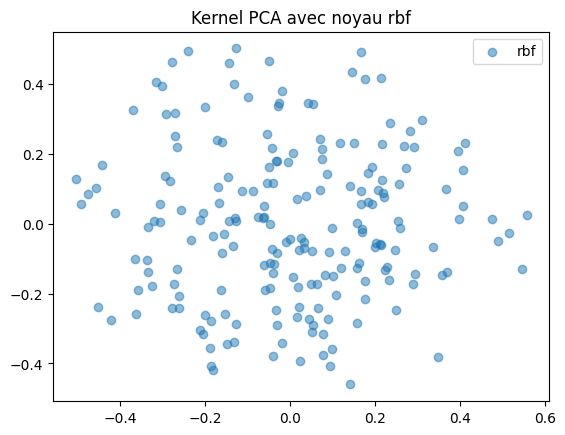

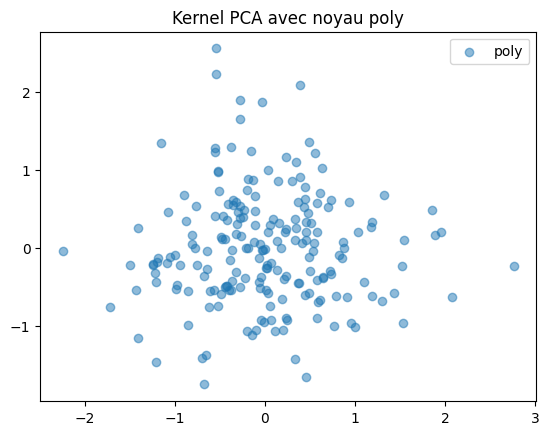

In [135]:
from sklearn.decomposition import KernelPCA

# Exercice 5 : ACP à Noyau
X_centre = donnee.values - np.mean(donnee.values, axis=0)
X_normalise = X_centre / np.std(donnee.values, axis=0)
kernels = ["linear", "rbf", "poly"]
for kernel in kernels:
    kpca = KernelPCA(n_components=2, kernel=kernel)
    X_kpca = kpca.fit_transform(X_normalise)

    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], alpha=0.5, label=kernel)
    plt.title(f"Kernel PCA avec noyau {kernel}")
    plt.legend()
    plt.show()


Partie 3 : Méthodes d'ensemble
Exercice 6 : Bagging (3 points)
11. Implémentez une forêt aléatoire (RandomForestClassifier) pour prédire la survie des poulets. Analysez les performances (accuracy, F1-score).
12. Identifiez les variables les plus importantes. Quels attributs influencent le plus la survie des poulets ? Pourquoi ?
Les attributs qui influencent le plus la survie des poulets sont le poids des poulet et l'humidité.
- Le poids est souvent un indicateur de la santé et du développement des poulets. Un poids trop faible peut signaler une malnutrition ou une mauvaise croissance, ce qui peut rendre les poulets plus vulnérables aux maladies et réduire leur espérance de vie.
- L'humidité joue un rôle crucial dans l'environnement de vie des poulets. Un taux d'humidité trop élevé ou trop bas peut affecter leur bien-être, leur respiration et leur capacité à réguler leur température corporelle. Une humidité excessive peut également favoriser la croissance de moisissures ou de bactéries, augmentant le risque de maladies respiratoires ou d'infections.

Accuracy: 0.583
F1-score: 0.545

Importance des variables :
Poids_poulet_g                 0.169246
Humidite_%                     0.168573
Nourriture_consommee_g_jour    0.144975
Cout_elevage_FCFA              0.142334
Gain_poids_jour_g              0.136227
Age_poulet_jours               0.120934
Temperature_enclos_C           0.117711
dtype: float64


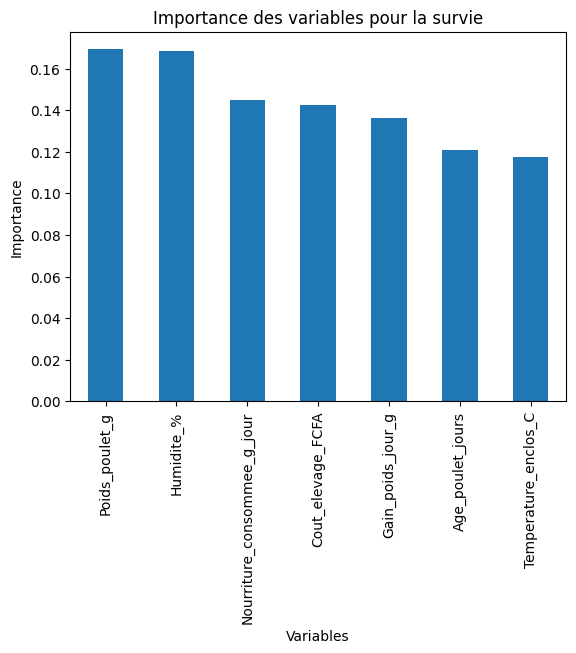

In [146]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt 

# EXERCICE 6 : Bagging
# 11. Random Forest pour prédire la survie
X = donnee.drop('Taux_survie_%', axis=1)
y = (data['Taux_survie_%'] > 90).astype(int)  # Binarisation : 1 si survie > 90%

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Création et entraînement du modèle
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred):.3f}")

# 12. Importance des variables
importances = rf.feature_importances_  
features = X.columns 
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

print("\nImportance des variables :")
print(feat_importance)

# Visualisation de l'importance des variables
feat_importance.plot(kind='bar')
plt.title("Importance des variables pour la survie")
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.show()




Exercice 7 : Boosting (3 points)
13. Comparez AdaBoost et Gradient Boosting sur la prédiction du gain de poids. Analysez leurs performances.
Les deux modèles obtiennent des scores très proches.
AdaBoost est légèrement meilleur, mais la différence n'est pas significative.
14. Les deux algorithmes réagissent-ils différemment aux outliers ? Expliquez pourquoi.
Oui les deux modèles réagissent différemment aux outliers :
1. AdaBoost :
Sensible aux outliers :
Donne plus de poids aux erreurs à chaque itération.
Les outliers mal prédits reçoivent des poids élevés, et ça peut fausser le modèle.
Si un point a une erreur de prédiction importante, AdaBoost va s'obstiner à le corriger au détriment des autres points.

2. Gradient Boosting :
Plus robuste :
Minimise les résidus (erreurs) étape par étape sans pondération explicite.
Utilise des gradients pour corriger progressivement les erreurs, ce qui atténue l'impact des outliers.
Un outlier influencera moins la direction globale de l'optimisation.

In [145]:
# EXERCICE 7  : Boosting
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

adaboost = AdaBoostRegressor(n_estimators=100)
gradient_boost = GradientBoostingRegressor(n_estimators=100)

adaboost.fit(X_train, y_train)
gradient_boost.fit(X_train, y_train)

y_pred_ada = adaboost.predict(X_test)
y_pred_gb = gradient_boost.predict(X_test)

r2_ada = r2_score(y_test, y_pred_ada)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"MSE AdaBoost : {mean_squared_error(y_test, y_pred_ada):.3f}")
print(f"MSE Gradient Boosting : {mean_squared_error(y_test, y_pred_gb):.3f}")

print(f"R² AdaBoost : {r2_ada:.3f}")
print(f"R² Gradient Boosting : {r2_gb:.3f}")

MSE AdaBoost : 0.253
MSE Gradient Boosting : 0.285
R² AdaBoost : -0.018
R² Gradient Boosting : -0.143
